# Thinkful Unsupervised Learning Capstone-Motion Capture Hand Postures Dataset
## By Archana Nagarajan

# Introduction
For my unsupervised learning capstone, I decided to use the Motion Capture Hand Postures Dataset. I sourced this data from UCI's repository: http://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures#


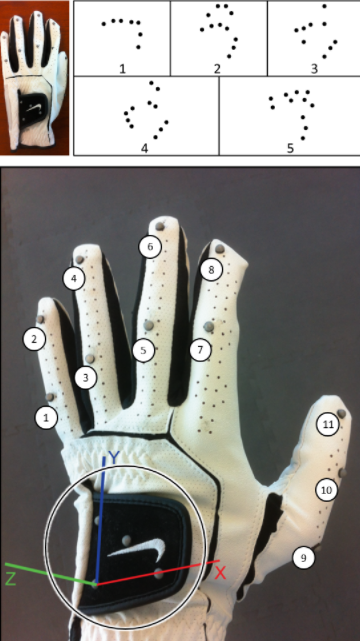

# Central Question
The dataset captures 5 different hand positions and conntains coordinates in a 3-D space related to the legend above. My goal here is to be able to cluster the data together based on the coordinates so that I can properly predict what hand position is being made. I hope to find the most precise mechanism that can cluster the groups based on their positions. I will use unsupervised learning methods (K means, mini batch K means, and GMM) and data visualization techniques to find the best model for clustering my data. 

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, boxcox
from scipy.stats.mstats import winsorize
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

import time
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from statistics import mean

In [4]:
import io
df = pd.read_csv("Postures.csv")

In [45]:
df.head()
#X,Y,Z all represent coordinates on a 3-D plane and the numbers ie. X1, Y2 etc
#correspond to the numbers in the image above

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,Cluster Predictions
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,0,0,0,0,0,0,0,0,0,0
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,0,0,0,0,0,0,0,0,0,0
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,0,0,0,0,0,0,0,0,0,0
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,0,0,0,0,0,0,0,0,0,0
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#omitting first row since it is all null
df=df[1:]
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


In [8]:
#making a copy of df to preserve original and work with copied frame 
df_copy = df
df_copy2 = df

In [9]:
#cleaning up df to get rid of symbols
df_copy = df_copy.replace('?', np.nan)
df_copy2 = df_copy2.replace('?', 0)

In [10]:
#checking for count of null values
null_values = df_copy.isnull().sum()
null_values[null_values>0]

X3       690
Y3       690
Z3       690
X4      3120
Y4      3120
Z4      3120
X5     13023
Y5     13023
Z5     13023
X6     25848
Y6     25848
Z6     25848
X7     39152
Y7     39152
Z7     39152
X8     47532
Y8     47532
Z8     47532
X9     54128
Y9     54128
Z9     54128
X10    63343
Y10    63343
Z10    63343
X11    78064
Y11    78064
Z11    78064
dtype: int64

In [11]:
#HUGE number of null values so cannot drop rows otherwise will be left with barely any data
#breaking down the dfs so that they will be easier to work with
#less nulls in a smaller sample size 
df_4 = df_copy.drop(['X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_5 = df_copy.drop(['X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_6 = df_copy.drop(['X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_7 = df_copy.drop(['X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_8 = df_copy.drop(['X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_9 = df_copy.drop(['X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
#creating four dfs based on the coordinates related to each hand section
#another method to create smaller clusters of data
df_nothumbnail = df_copy2.drop(['X11', 'Y11', 'Z11'], axis=1)
df_nothumb = df_copy2.drop(['X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11'], axis=1)
df_noknuckle = df_copy2.drop(['X1', 'Y1', 'Z1', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5', 'X7', 'Y7', 'Z7'], axis=1)
df_selected = df_copy2[['Class', 'User', 'X2', 'Y2', 'Z2', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8']]

In [12]:
#removing nulls from dfs 4-9
df_4.dropna(inplace=True)
df_5.dropna(inplace=True)
df_6.dropna(inplace=True)
df_7.dropna(inplace=True)
df_8.dropna(inplace=True)
df_9.dropna(inplace=True)


In [13]:
#naming dfs for formality to be referenced throughout analysis
df_copy.name = 'df_copy'
df_4.name = 'df_4'
df_5.name = 'df_5'
df_6.name = 'df_6'
df_7.name = 'df_7'
df_8.name = 'df_8'
df_9.name = 'df_9'
df_copy2.name = 'df_copy2'
df_nothumbnail.name = 'df_nothumbnail'
df_nothumb.name = 'df_nothumb'
df_noknuckle.name = 'df_noknuckle'
df_selected.name = 'df_selected'

In [14]:
#defining functions and creating variables and standardizing variables 
def target_feature_scalar(df):


  global X, y, X_std, name

  
  X = df.drop(['Class', 'User'], axis=1)
  y = df['Class']

  # Standarizing features
  scaler = StandardScaler()
  X_std = scaler.fit_transform(X)

  name = df.name
  return X_std

In [15]:
#defining ARI score to be used later as a metric
def ari(predict):
  return metrics.adjusted_rand_score(y, predict)

In [16]:
#defining Siloutte score function to be used later as a metric
def silhouette(predict):
  return metrics.silhouette_score(X_std, predict, metric='euclidean')

In [17]:
# defining function to create a table of cluster numbers, ARI scores and Silhouette scores
# inputs are range start and end (clusters X through Y), df, and which model was used 
def scores_table(range_start, range_end, df, model):
  ari_scores = []
  silhouette_scores = []
  for i in range(range_start,range_end):
    model(i, df)
    ari_scores.append(ari(y_pred))
    silhouette_scores.append(silhouette(y_pred))

  metric_scores = pd.DataFrame()
  metric_scores['ARI Scores'] = ari_scores
  metric_scores['Silhouette Scores'] = silhouette_scores
  metric_scores.set_index(pd.Series(range(range_start,range_end),  name='Cluster Number'))

  print (metric_scores.set_index(pd.Series(range(range_start,range_end),  name='Cluster Number')))



In [18]:
#starting out here with mini batch K means 
def minikmeans_function(n, df):
 
  global minikmeans_cluster, y_pred

  minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=n,
    batch_size=50)

  # fitting model
  %timeit minikmeans_cluster.fit(X_std)
  y_pred = minikmeans_cluster.predict(X_std)

  # adding a column to the df to compare clusters to original classes
  df['Cluster Predictions'] = y_pred


In [19]:
#using mini batch k means to find the best performing df to use on other models
for i in [df_4, df_5, df_6, df_7, df_8, df_9, df_nothumbnail, df_nothumb, df_noknuckle, df_selected]:
  target_feature_scalar(i)
  scores_table(2, 10, i, minikmeans_function)
  print ('ARI and Silhouette Scores for ' + str(i.name) + '\n')

628 ms ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
660 ms ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
583 ms ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
735 ms ± 495 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
735 ms ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
935 ms ± 480 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.11 s ± 363 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
770 ms ± 463 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
                ARI Scores  Silhouette Scores
Cluster Number                               
2                 

<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


396 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


271 ms ± 82.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


413 ms ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


465 ms ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


404 ms ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


490 ms ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


553 ms ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ipython-input-18-378b1bf168a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster Predictions'] = y_pred


                ARI Scores  Silhouette Scores
Cluster Number                               
2                 0.275958           0.219784
3                 0.336024           0.135733
4                 0.272305           0.104982
5                 0.278575           0.111521
6                 0.212235           0.121547
7                 0.189999           0.121473
8                 0.199677           0.114894
9                 0.203443           0.106270
ARI and Silhouette Scores for df_selected



In [20]:
#df_nothumb had the best ARI score and so we will use this df for analysis 
#using Elbow method to determine the best number of clusters to use going forward
wcss=[]

for i in range(1,10):
  minikmeans_function(i, df_nothumb)
  wcss_iter = minikmeans_cluster.inertia_
  wcss.append(wcss_iter)

362 ms ± 97.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
319 ms ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
375 ms ± 86.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
450 ms ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
377 ms ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
479 ms ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
730 ms ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
559 ms ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.62 times longer than the fastest. This could mean that an intermediate result is being cached.
637 ms ± 342 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


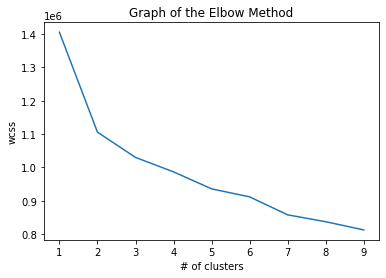

In [21]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('Graph of the Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
#checking performance of mini-batch kmeans with df_nothumb and five clusters
avg_ari_score = []
for i in range(5):
  target_feature_scalar(df_nothumb)
  minikmeans_function(5, df_nothumb)
  avg_ari_score.append(ari(y_pred))

print ('Average ARI score for minibatch k-means: {}'.format(mean(avg_ari_score)))

416 ms ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
443 ms ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
401 ms ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
477 ms ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
724 ms ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Average ARI score for minibatch k-means: 0.32488884654304206


In [52]:
#going next to GMM
def gmm_function(n, df, maxiter, covariancetype, ninit):
  

  global gmm_cluster, y_pred
  

  gmm_cluster = GaussianMixture(n_components=n, random_state=123, max_iter=maxiter, covariance_type=covariancetype, n_init=ninit)
  

  # fitting model
  %timeit gmm_cluster.fit(X_std)
  y_pred = gmm_cluster.predict(X_std)

  # adding a column to the dataframe so we can compare clusters to original classes
  df['Cluster Predictions'] = y_pred

In [56]:
#checking performance of GMM with df_nothumb and five clusters
avg_ari_score = []
for i in range(5):
  target_feature_scalar(df_nothumb)
  gmm_function(5, df_nothumb, 100, 'full', 1)
  avg_ari_score.append(ari(y_pred))

print ('Average ARI score for GMM: {}'.format(mean(avg_ari_score)))

3.15 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.44 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.47 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.61 s ± 61.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Average ARI score for GMM: 0.356369573481831


In [27]:
#now I would like to use K-means
def kmeans_function(n, df):
  
  global kmeans_cluster, y_pred
  
  kmeans_cluster = KMeans(n_clusters=n, random_state=3939)

  # fitting model
  %timeit kmeans_cluster.fit(X_std)
  y_pred = kmeans_cluster.predict(X_std)

  # adding a column to the df to compare clusters to original classes
  df['Cluster Predictions'] = y_pred
  print ('Comparison of predictions using {} clusters vs original labeled class'.format(n))
  print (pd.crosstab(df['Cluster Predictions'], df['Class']), '\n')

In [28]:
#checking performance of K-means with df_nothumb and five clusters
avg_ari_score = []
for i in range(5):
  target_feature_scalar(df_nothumb)
  kmeans_function(5, df_nothumb)
  avg_ari_score.append(ari(y_pred))

print ('Average ARI score for kmeans: {}'.format(mean(avg_ari_score)))

1.57 s ± 60.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Comparison of predictions using 5 clusters vs original labeled class
Class                    1     2      3      4     5
Cluster Predictions                                 
0                     1415   151   4728  10274   890
1                       10  6456     17    808  4026
2                    13796   132  10113   1065   286
3                        0  1056    228    933  8796
4                     1044  7183   1258   1695  1735 

1.39 s ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Comparison of predictions using 5 clusters vs original labeled class
Class                    1     2      3      4     5
Cluster Predictions                                 
0                       10  6455     17    808  4028
1                    13796   132  10113   1065   286
2                     1415   151   4728  10274   889
3                     1044  6879   1289   1755  1604
4                        0  1361   

In [29]:
#comparing cluster predictions to labeled target values
target_feature_scalar(df_nothumb)

array([[ 0.11981925, -0.35684664, -1.01341207, ..., -0.6815126 ,
         0.3765667 ,  0.05208092],
       [ 0.18905405, -0.33695189, -0.92981748, ..., -0.6815126 ,
         0.3765667 ,  0.05208092],
       [ 0.16832865, -0.33191609, -0.94808011, ..., -0.6815126 ,
         0.3765667 ,  0.05208092],
       ...,
       [ 0.11638332,  1.08091801, -0.41290612, ...,  1.30399072,
         0.52805298,  1.66128348],
       [-0.68605392,  0.55205173,  1.18736828, ...,  0.53402111,
        -2.12016139, -1.55712164],
       [-0.68656181,  0.55417809,  1.19589227, ...,  0.53720551,
        -2.11245848, -1.55712164]])

In [31]:
#writing function to compare clusters
def cluster_comparison(df):
  # Barplot of clusters vs original classes
  df_graph = pd.crosstab(df['Cluster Predictions'], df['Class'])
  df_graph = df_graph.stack().reset_index().rename(columns={0: 'value'})
  sns.barplot(x=df_graph['Cluster Predictions'], y=df_graph.value, hue=df_graph.Class)

1.79 s ± 53.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Comparison of predictions using 5 clusters vs original labeled class
Class                    1     2      3      4     5
Cluster Predictions                                 
0                    13804   131  10115   1065   286
1                     1036  6787   1293   1765  1558
2                       10  6502     17    808  4039
3                        0  1394    183    851  8948
4                     1415   164   4736  10286   902 



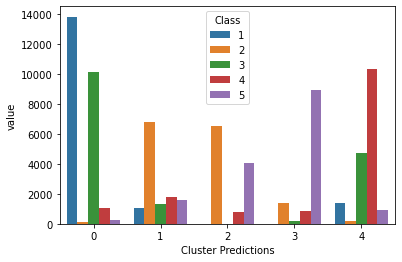

In [32]:
#comparing clusters for k means
kmeans_function(5, df_nothumb)
cluster_comparison(df_nothumb)

678 ms ± 263 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


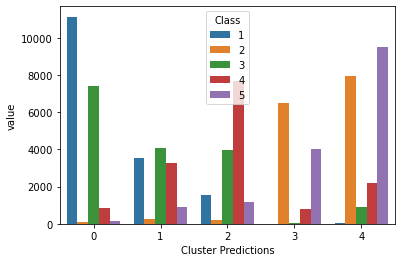

In [33]:
#comparing clusters for mini batch k means
minikmeans_function(5, df_nothumb)
cluster_comparison(df_nothumb)

2.4 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


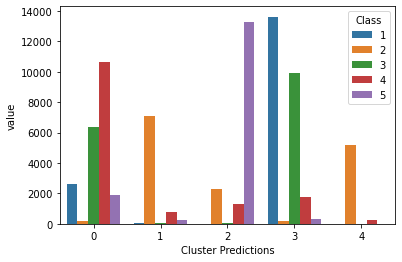

In [60]:
#comparing clusters for GMM
gmm_function(5, df_nothumb, 100, 'full', 1)
cluster_comparison(df_nothumb)

In [34]:
#using PCA to visualize data and clusters 
def pca_function(n, d):
  global pca, y_pred
  pca = PCA(n_components=n)
  pca = pca.fit_transform(d)
  df_subset = pd.DataFrame()
  df_subset['pca_one'] = pca[:,0]
  df_subset['pca_two'] = pca[:,1]

  return pca

In [35]:
#using SNS to visualize PCA method
def snsgraph_function(drf, num_clusters):

  df_subset = pd.DataFrame()
  df_subset['First Component'] = drf[:,0]
  df_subset['Second Component'] = drf[:,1]

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=str(df_subset.columns[0]), y=str(df_subset.columns[1]),
    hue=y,
    palette=sns.color_palette("deep", num_clusters),
    data=df_subset,
    legend="full",
    alpha=0.8)
  
  plt.title(name)

In [37]:
pca_function(2, X_std)

array([[ 3.59611031,  0.01847352],
       [ 3.54404849, -0.4267571 ],
       [ 3.55452115, -0.40737184],
       ...,
       [-2.34012174,  2.73211423],
       [-2.93426703, -0.60399498],
       [-3.11519237, -0.39151446]])

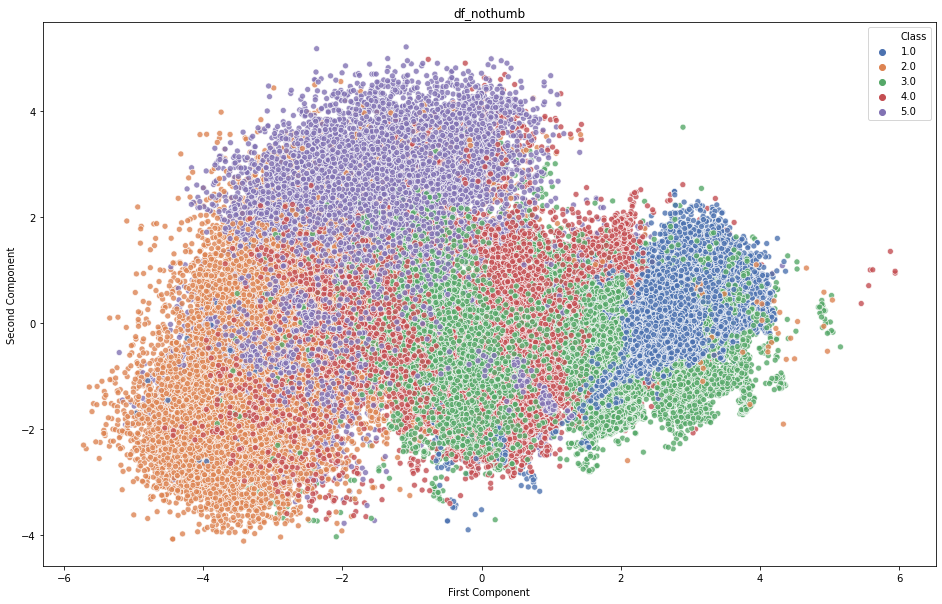

In [38]:
snsgraph_function(pca, 5)

In [57]:
#using tSNE for data visualization method #2
def tsne_function(n, d, clusters, name, perp):


  global tsne


  tsne = TSNE(n_components=n, verbose=1, perplexity=perp, n_iter=300)
  tsne = tsne.fit_transform(d)


  df_subset = pd.DataFrame()
  df_subset['tsne_one'] = tsne[:,0]
  df_subset['tsne_two'] = tsne[:,1]

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x="tsne_one", y="tsne_two",
    hue=y,
    palette=sns.color_palette("deep", clusters),
    data=df_subset,
    legend="full",
    alpha=0.8)
  
  plt.title(name)

  return tsne

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 78095 samples in 3.535s...
[t-SNE] Computed neighbors for 78095 samples in 597.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 78095
[t-SNE] Computed conditional probabilities for sample 2000 / 78095
[t-SNE] Computed conditional probabilities for sample 3000 / 78095
[t-SNE] Computed conditional probabilities for sample 4000 / 78095
[t-SNE] Computed conditional probabilities for sample 5000 / 78095
[t-SNE] Computed conditional probabilities for sample 6000 / 78095
[t-SNE] Computed conditional probabilities for sample 7000 / 78095
[t-SNE] Computed conditional probabilities for sample 8000 / 78095
[t-SNE] Computed conditional probabilities for sample 9000 / 78095
[t-SNE] Computed conditional probabilities for sample 10000 / 78095
[t-SNE] Computed conditional probabilities for sample 11000 / 78095
[t-SNE] Computed conditional probabilities for sample 12000 / 78095
[t-SNE] Computed conditional probabilities for s

array([[-0.81130254, -5.467542  ],
       [-1.5799437 , -6.2518654 ],
       [-1.5795927 , -6.2495112 ],
       ...,
       [ 2.649051  ,  1.7273184 ],
       [ 3.1242096 ,  3.4237905 ],
       [ 3.237924  ,  3.4190297 ]], dtype=float32)

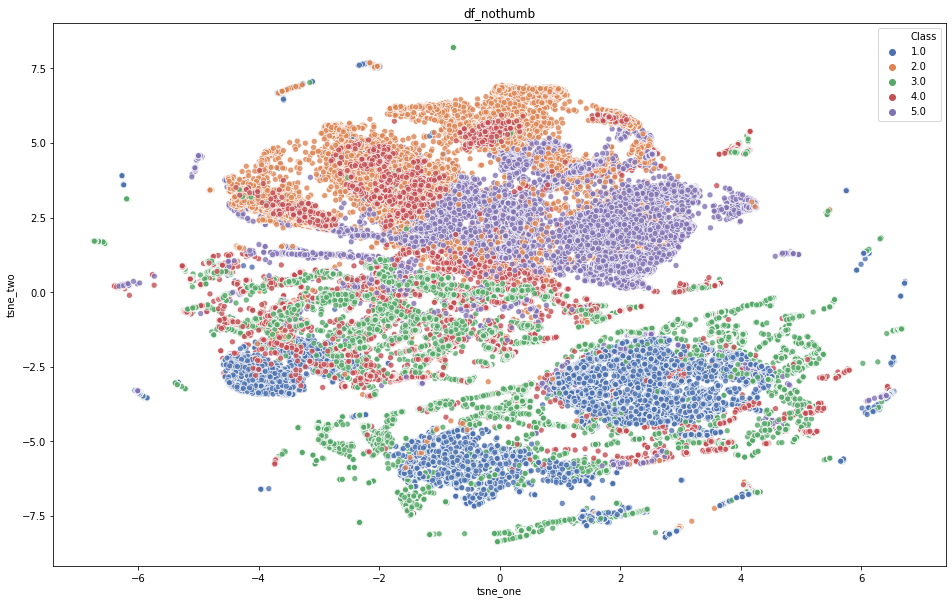

In [58]:
tsne_function(2, target_feature_scalar(df_nothumb), 5, name, 20)

# Conclusion
After running multiple machine learning models, it seems like GMM had the best results based on its ARI aof 0.356, which was better than the other models that I used. This was performed on the df_nothumb frame which included coordinates that were not on the thumb. GMM also seemed to do a better job in spreading out the classes into clusters when I did the cluster comparisons. 
Upon doing PCA/tSNE analysis, it seemed that positions 5 and 2 were the most distinct, which makes sense because they were pretty much visual opposites. 
In the future, I would like to explore more models like DBSCAN and perhaps further tune my current models for higher scores. 
This was a great unsupervised learning experience for me. 